In [152]:
import numpy as np
import pandas as pd

In [153]:
dataset = pd.read_csv("50_Startups.csv")

In [154]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [155]:
dataset.isnull().any()

R&D Spend          False
Administration     False
Marketing Spend    False
State              False
Profit             False
dtype: bool

In [156]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['State'] = le.fit_transform(dataset['State'])


In [157]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [158]:
x = dataset.iloc[:,0:4].values
y = dataset.iloc[:,4:5].values

In [159]:
x.shape

(50, 4)

In [160]:
y.shape

(50, 1)

In [161]:
from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder()
z = one.fit_transform(x[:,3:4]).toarray()
x = np.delete(x,3,axis = 1)
x = np.concatenate((z,x),axis = 1)

C:\Users\prads\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [162]:
x.shape

(50, 6)

In [163]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state =0)

In [164]:
x_train.shape

(40, 6)

In [165]:
from sklearn.linear_model import LinearRegression
mlr  = LinearRegression()
mlr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [166]:
y_pred = mlr.predict(x_test)

In [167]:
y_pred

array([[103015.20159797],
       [132582.27760815],
       [132447.73845174],
       [ 71976.09851258],
       [178537.48221055],
       [116161.24230166],
       [ 67851.69209676],
       [ 98791.73374688],
       [113969.43533013],
       [167921.0656955 ]])

In [168]:
x_test

array([[0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 6.6051520e+04,
        1.8264556e+05, 1.1814820e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0067196e+05,
        9.1790610e+04, 2.4974455e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.0191308e+05,
        1.1059411e+05, 2.2916095e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 2.7892920e+04,
        8.4710770e+04, 1.6447071e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.5344151e+05,
        1.0114555e+05, 4.0793454e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 7.2107600e+04,
        1.2786455e+05, 3.5318381e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 2.0229590e+04,
        6.5947930e+04, 1.8526510e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 6.1136380e+04,
        1.5270192e+05, 8.8218230e+04],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 7.3994560e+04,
        1.2278275e+05, 3.0331926e+05],
       [0.0000000e+00, 1.0000000e+00,

In [169]:
from sklearn.metrics import r2_score
accuracy = r2_score(y_test,y_pred)

In [170]:
accuracy

0.934706847328222

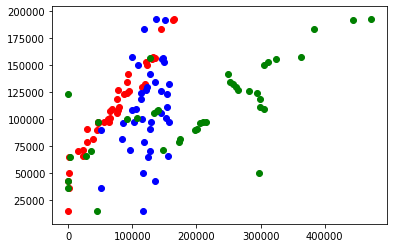

In [171]:
import matplotlib.pyplot as plt
plt.scatter(x_train[:,3],y_train[:,0],color = "red")
plt.scatter(x_train[:,4],y_train[:,0],color = "blue")
plt.scatter(x_train[:,5],y_train[:,0],color = "green")

In [150]:
mlr.predict([[0,0,1,12345,123456,123456]])

array([[61381.51739103]])

In [151]:
y[0][0]

192261.83

In [129]:
def  predict(x1,x2,x3,x4):
    a0 =3
    a1 = 2
    a2 = 4
    a3 =2
    a4= 5
    y  = a0+a1*x1+a2*x2+a3*x3+a4*x4